# 决策树

决策树可以既可以实现分类，也可以实现回归。随机森林由决策树组成，现今最强大的机器学习算法之一。

In [32]:
import pandas as pd
import numpy as np

# 绘图
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 所需数据集
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

# 分类树
from sklearn.tree import DecisionTreeClassifier
# 可视化决策树
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO # 生成StringIO对象
from IPython.display import Image
import graphviz

# 回归树
from sklearn.tree import DecisionTreeRegressor

## 决策树训练和可视化

In [6]:
iris = load_iris()
print(type(iris))
print(iris.keys())
print(iris.data[:6, :])
X = iris.data[:, 2:] 
y = iris.target

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [7]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [26]:
# 第一种可视化方法，此方法需要使用dot命令进行可视化
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

export_graphviz(tree_clf,
               out_file = image_path("iris_tree.dot"),
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True)


In [35]:
# 第二种可视化决策树方法
# 将结果保存成图片

# 加入环境变量
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO() #把文件暂时写在内存的对象中

export_graphviz(tree_clf,
               # out_file = None,
               out_file = dot_data,
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph = graphviz.Source(dot_data)
# graph
graph.write_png('iris_tree.png')
# Image(graph.create_png())

True

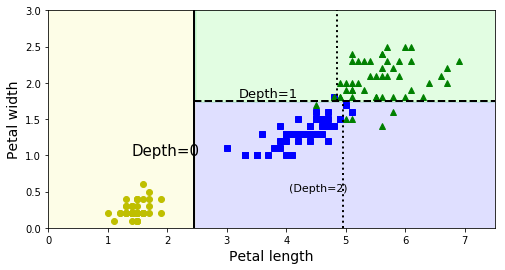

In [9]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


plt.show()

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

In [16]:
print(type(X))

<class 'numpy.ndarray'>


In [19]:
# 条件筛选，会形成索引值，根据索引值查找对应的数值
X[(X[:, 1] == X[:, 1][y == 1].max()) & (y == 1)] 

array([[4.8, 1.8]])

In [ ]:
not_widest_versicolor = (X[:, 1] != 1.8 | (y == 2))
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)